#**I. PROJECT MODULE IV - RESÍLIA - GROUP 7**

**I.I Briefing**


"Você e a sua equipe foram escalados pela Agência Nacional de Petróleo e Gás
Natural e Biocombustíveis (ANP) para realizar uma análise exploratória
relacionada à série histórica de preço de venda da gasolina e do etanol. ANP é
um centro de referência em dados e informações sobre a indústria de petróleo
e gás natural:


● mantém o Banco de Dados de Exploração e Produção (BDEP);
● promove estudos sobre o potencial petrolífero e o desenvolvimento do
setor;
● recebe e torna públicas as notificações de descobertas;
● divulga as estatísticas oficiais sobre reservas, refino e produção de
petróleo, gás e biocombustíveis no Brasil.

A ANP também realiza e divulga rotineiramente pesquisas sobre qualidade dos
combustíveis e lubrificantes e sobre o comportamento dos preços desses
produtos. Consolida e divulga informações sobre os mercados regulados e
acerca dos investimentos em pesquisa, inovação e formação profissional
voltadas para os setores regulados.

As fontes de dados que serão utilizadas no projeto estão disponíveis no portal
dados.gov. Serão utilizados os arquivos dos meses de junho e julho de 2021
contendo a série histórica dos preços da gasolina e do etanol em todo o Brasil." 

**I.II Problemas a serem resolvidos**

1) Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do etanol e da gasolina tiveram uma tendência de queda ou diminuição?

2) Qual o preço médio da gasolina e do etanol nesses dois meses?

3)Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?

4) Qual o preço médio da gasolina e do etanol por estado?

5) Qual o município que possui o menor preço para a gasolina e para o etanol?

6) Qual o município que possui o maior preço para a gasolina e para o etanol?

7) Qual a região que possui o maior valor médio da gasolina?

8) Qual a região que possui o menor valor médio do etanol?

9) Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?

10) Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?


11) Outlier Gasolina
12) Outlier Etanol


Link dos Datasets:https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2021/2021-07-gasolina-etanol.csv
///
https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2021/2021-06-gasolina-etanol.csv


##**I.I IMPORTING LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##**I.II CLEANING DATAS**

## **Importação de datasets**


In [ ]:
url = 'https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2021/2021-06-gasolina-etanol.csv'
gasol_06 = pd.read_csv(url, engine = 'python', on_bad_lines='skip', sep = ';')
#gasol_06

In [ ]:
url = 'https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2021/2021-07-gasolina-etanol.csv'
gasol_07 = pd.read_csv(url,on_bad_lines='skip',sep = ';')
#gasol_07

## **Análise de objetos**


In [ ]:
gasol_06.info()

## **Substituções**


In [ ]:
gasol_06['Valor de Venda'] = gasol_06['Valor de Venda'].apply(lambda x:str(x).replace(",","."))

In [ ]:
gasol_06['Valor de Venda'] = gasol_06['Valor de Venda'].astype('float64')

## **Questões 1 e 2 (Henrique)**

In [ ]:
gasolinaMes6 = gasol_06[gasol_06['Produto'].isin(['GASOLINA','GASOLINA ADITIVADA'])]
#gasolinaMes6

In [ ]:
gasolinaMes6['Valor de Venda'].mean()

Váriavel que armazena o valor 'média' do mês 6 com o produto gasolina

In [ ]:
etanolMes6 = gasol_06[gasol_06['Produto'].isin(['ETANOL'])]

Váriavel que armazena dataframe somente com produtos 'Etanol'

In [ ]:
mediaEtanol6 = etanolMes6['Valor de Venda'].mean()

Váriavel que armazena o valor 'média' do mês 6 com o produto gasolina

In [ ]:
gasol_07['Valor de Venda'] = gasol_07['Valor de Venda'].apply(lambda x:str(x).replace(",","."))

Replace de ',' por '.' para que possa ser feita conversão de dados

In [ ]:
gasol_07['Valor de Venda']=gasol_07['Valor de Venda'].astype('float64')

Conversão de dado str para float

In [ ]:
gasolinaMes7 = gasol_07[gasol_07['Produto'].isin(['GASOLINA','GASOLINA ADITIVADA'])]

Váriavel que armazena dataframe somente com produto gasolina

In [ ]:
etanolMes7 = gasol_07[gasol_07['Produto'].isin(['ETANOL'])]

Váriavel que armazena dataframe somente com o produto etanol

In [ ]:
mediaEtanol7 = etanolMes7['Valor de Venda'].mean()

Variável que calcula a média do preço do etanol no mês 7

In [ ]:
mediaGasolina7 = gasolinaMes7['Valor de Venda'].mean()

Váriavel que calcula a média da gasolina do mês 7

In [ ]:
mediaGasolina7

5.8617029846511235

In [ ]:
mediaEtanol7

4.587550062034796

In [ ]:
mediaEtanol6

4.576388725259197

In [ ]:
gasol_06['Data da Coleta'] = pd.to_datetime(gasol_06['Data da Coleta'])

In [ ]:
df6e7 = pd.concat([gasol_06,gasol_07])


Dataframe 6 e 7 concatenados

In [ ]:
df6e7Gasolina = df6e7[df6e7['Produto'].isin(['GASOLINA','GASOLINA ADITIVADA'])]


In [ ]:
df6e7['Data da Coleta'] = pd.to_datetime(df6e7['Data da Coleta'])

Conversão de dados str para date

Dataframe dos meses 6 e 7 concatenado e filtrado por produto GASOLINA


In [ ]:
df6e7Gasolina['Valor de Venda'] = df6e7Gasolina['Valor de Venda'].astype('float64')

Conversao do tipo de dados para float
e date

In [ ]:
df6e7Gasolina['Data da Coleta'] = pd.to_datetime(df6e7Gasolina['Data da Coleta'])

In [ ]:
df6e7Gasolina.mean()

Media do valor da gasolina nos meses 6 e 7

In [ ]:
df6e7Etanol = df6e7[df6e7['Produto'].isin(['ETANOL'])]


Dataframe dos meses 6 e 7 concatenado e filtrado por produto ETANOL

In [ ]:
df6e7EtanolFloat= df6e7Etanol['Valor de Venda'].astype('float64')

Conversão de tipo de dados

In [ ]:
df6e7EtanolFloat.mean()

Média do preço do etanol nos meses 6 e 7

In [ ]:
sns.set()

In [ ]:
y = df6e7['Valor de Venda']
x = df6e7['Data da Coleta']
plt.title('Dispersão dos preços dos Combustíveis 06/21 - 07/21')
plt.scatter(x,y)
plt.show()

In [ ]:
y = df6e7Gasolina['Valor de Venda']
x = df6e7Gasolina['Data da Coleta']
plt.scatter(x,y)
plt.title('Dispersão do Preço da gasolina 06/21 - 07/21')
plt.show()

In [ ]:
y = df6e7Etanol['Valor de Venda']
x = df6e7Etanol['Data da Coleta']
plt.title('Dispersão do preço do Etanol 06/21 - 07/21')
plt.scatter(x,y)
plt.show()

In [ ]:
df6e7.hist('Valor de Venda',bins = 100)
plt.title('Histograma - Preço dos combustíveis no período 06/21 - 07/21')
plt.show()

In [ ]:
df6e7Gasolina.hist('Valor de Venda',bins = 100)
plt.title('Histograma - Preço do Gasolina 07/21')
plt.show()

In [ ]:
df6e7Etanol.hist('Valor de Venda',bins = 100)
plt.title('Histograma - Preço do Etanol 07/21')
plt.show()


## **Questão 3 (Jaqueline)**

>Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?

Os primeiros processos para conscrução da resposta foi analisar os passos necessários, os quais seguem abaixo:

1. Organização dos dados necessários
2. Concatenção tabela 06 e 07
3. Ordenação e Média





Ao  decorrer da questão, notei que seria necessário restruturar o DataFrame com informações que atendecem meus requisitos.

Com o objetivo de vizualizar melhor as colunas nas quais obtinham os dados que eu precisaria, realizei uma combinação de  filtragem e concatenação.

Por fim, filtrei as colunas necessárias, separei por etanol/ gasolina e gasolina aditivada,  concatei as tabelas 06 e 07 . Após isso criei uma variável para a mádia de cada um, agrupando as informações desejadas e obtive o resultado AC/AL/AM/AP/BA como estados com a maior média da Gasolina.


In [ ]:
novo_06 = gasol_06.filter(['Estado - Sigla', 'Município', 'Produto', 'Valor de Venda'], axis=1)
novo_06

In [ ]:
gasolinaMes6 = novo_06[novo_06['Produto'].isin(['GASOLINA','GASOLINA ADITIVADA'])]
gasolinaMes6

In [ ]:
etanolMes6 = novo_06[novo_06['Produto'].isin(['ETANOL'])]
etanolMes6

In [ ]:
novo_07 = gasol_07.filter(['Estado - Sigla', 'Município', 'Produto', 'Valor de Venda'], axis=1)
novo_07

In [ ]:
gasolinaMes7 = novo_07[novo_07['Produto'].isin(['GASOLINA','GASOLINA ADITIVADA'])]
gasolinaMes7

In [ ]:
etanolMes7 = novo_07[novo_07['Produto'].isin(['ETANOL'])]
etanolMes7

Verificando a média individual de 06 e 07

In [ ]:
gasolinaMes6['Valor de Venda'].mean()

5.734489270779255

In [ ]:
gasolinaMes7['Valor de Venda'].mean()

5.8617029846511235

In [ ]:
etanolMes6['Valor de Venda'].mean()

4.576388725259197

In [ ]:
etanolMes7['Valor de Venda'].mean()

4.587550062034796

Concatenação das tabelas 06 e 07 - Gasolina

OBS:
Foi analisado a média do valor de venda da gasolina nos meses de junho e julho de forma unificada, que é de 5.79, para comparação dos dados mais segmentados, caso houvesse dados muito distintos.

In [ ]:
concat_gasol = pd.concat([gasolinaMes6, gasolinaMes7])
concat_gasol

In [ ]:
concat_gasol['Valor de Venda'].mean()

Concatenação das tabelas 06 e 07 - Etanol

OBS: A média geral do Etanol nos meses deJunho e Julho é 4.58.

In [ ]:
concat_etanol = pd.concat([etanolMes6, etanolMes7])
concat_etanol

In [ ]:
concat_etanol['Valor de Venda'].mean()

In [ ]:
estado_mediagasol = concat_gasol.groupby('Estado - Sigla').mean()

In [ ]:
estado_mediagasol.groupby(by="Estado - Sigla")["Valor de Venda"].nlargest(5).head(5)

In [ ]:
estado_mediaetanol = concat_etanol.groupby('Estado - Sigla').mean()

In [ ]:
estado_mediaetanol.groupby(by="Estado - Sigla")["Valor de Venda"].nlargest(5).head(5)

Os 5 estados com ambas médias mais caras são:

1. Acre
2. Alagoas
3. Amazonas
4. Amapá
5. Bahia

## **Questão 4 (Laio)**

> 4) Qual o preço médio da gasolina e do etanol por estado?

- Selecionei a partir do dataframe concatenado apenas as tabelas que considerei importantes para extrair as informações da questão 4

In [ ]:
df6e7[['Estado - Sigla','Produto', 'Valor de Venda']]

- Converti a coluna Valor de Venda para numérico

In [ ]:
df6e7['Valor de Venda'] = pd.to_numeric(df6e7['Valor de Venda'])

**Etanol**

- Criei um novo df onde selecionei apenas o produto = 'ETANOL', juntamente com as colunas que foram necessárias para a extração do preço médio do produto por estado

In [ ]:
medio_etanol_estado = (df6e7.loc[df6e7['Produto'] == 'ETANOL', ["Estado - Sigla","Produto", "Valor de Venda"]])

- Agrupei o df onde havia apenas o produto ETANOL por estado e extraí a média dos valores de venda

In [1]:
medio_etanol_estado.groupby(['Produto', 'Estado - Sigla'], as_index = False).mean()

NameError: ignored

**Gasolina**

- Criei um novo df onde selecionei apenas o produto = 'GASOLINA', juntamente com as colunas que foram necessárias para a extração do preço médio do produto por estado

In [ ]:
medio_gasolina_estado = (df6e7.loc[df6e7['Produto'] == 'GASOLINA', ["Estado - Sigla", "Produto", "Valor de Venda"]])

- Agrupei o df onde havia apenas o produto GASOLINA por estado e extraí a média dos valores de venda

In [ ]:
(medio_gasolina_estado.groupby(['Produto', 'Estado - Sigla'], as_index = False).mean())

**Gasolina Aditivada**

In [ ]:
medio_gasoadit_estado = (df6e7.loc[df6e7['Produto'] == 'GASOLINA ADITIVADA', ["Estado - Sigla", "Produto", "Valor de Venda"]])

- Agrupei o df onde havia apenas o produto GASOLINA ADITIVADA por estado e extraí a média dos valores de venda

In [ ]:
(medio_gasoadit_estado.groupby(['Produto', 'Estado - Sigla'], as_index = False).mean())

## **Questões 5 e 6 (Beatriz)**

> Principais etapas para elaborar a resposta da questão: 

• Concatenar os Dataframes referentes aos meses de junho (gasol_06) e julho (gasol_07);

• Obter um resumo conciso do dataframe por meio da função df.info()

• Utilizar a função astype para alterar o tipo de dados da coluna ‘Valor de Venda’ para float;

• Para descobrir quais municípios apresentaram o valor máximo e o valor mínimo dos produtos solicitados, foram criadas variáveis que agregam as consultas (método query) dos respectivos valores (funções min() e max());

• Utilizar o método format() que permite substituições e formatação de valor.




In [ ]:
url = 'https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2021/2021-06-gasolina-etanol.csv'
gasol_06 = pd.read_csv(url,on_bad_lines='skip', sep = ';')
#gasol_06

In [ ]:
url = 'https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2021/2021-07-gasolina-etanol.csv'
gasol_07 = pd.read_csv(url, engine = 'python', on_bad_lines='skip', sep = ';')
#gasol_07

In [ ]:
df6e7 = pd.concat([gasol_06, gasol_07])
#df6e7

In [ ]:
df6e7.info()

In [ ]:
#df6e7.head(5)

In [ ]:
df6e7['Valor de Venda'] = df6e7['Valor de Venda'].apply(lambda x:str(x).replace(",",".")) 
df6e7

In [ ]:
df6e7['Valor de Venda'] = df6e7['Valor de Venda'].astype('float64')
df6e7

**5) Qual o município que possui o menor preço para a gasolina e para o etanol?**


Função utilizada para consultar qual município apresenta o menor preço da Gasolina

In [ ]:
min_gasolina = df6e7.query('Produto == "GASOLINA"')['Valor de Venda'].min()
df6e7.query('Produto == "GASOLINA" and `Valor de Venda` == {}'.format(min_gasolina))


Função utilizada para consultar qual município apresenta o menor preço do Etanol

In [ ]:
min_etanol = df6e7.query('Produto == "ETANOL"')['Valor de Venda'].min()
df6e7.query('Produto == "ETANOL" and `Valor de Venda` == {}'.format(min_etanol))

**6) Qual o município que possui o maior preço para a gasolina e para o etanol?**

Função utilizada para consultar qual município apresenta o maior preço da Gasolina

In [ ]:
max_gasolina = df6e7.query('Produto == "GASOLINA"')['Valor de Venda'].max()
df6e7.query('Produto == "GASOLINA" and  `Valor de Venda` == {}'.format(max_gasolina))


Função utilizada para consultar qual município apresenta o maior preço do Etanol

In [ ]:
max_etanol = df6e7.query('Produto == "ETANOL"')['Valor de Venda'].max()
df6e7.query('Produto == "ETANOL" and `Valor de Venda` == {}'.format(max_etanol))

##**Questão 7 (Jaqueline)**

> Qual a região que possui o maior valor médio da gasolina?

Para resolução da pergunta foi criado um DataFrame contendo somente as siglas das regiões, o produto e o valor de venda. O processo para resposta da pergunta seguiu a seguinte lógica: 

1. criação do DF e Concatenaçã0 06/07
2. média
3. ordenação

Seleção de dados importantes do DataFrame - mês 06

In [ ]:
regiao_06 = gasol_06.filter(['Região - Sigla','Produto', 'Valor de Venda'], axis=1)
regiao_06

,Região - Sigla,Produto,Valor de Venda
0,N,GASOLINA,"6,89"
1,N,GASOLINA ADITIVADA,"6,89"
2,N,ETANOL,"6,1"
3,N,GASOLINA,"6,89"
4,N,GASOLINA,"6,89"
...,...,...,...
49732,NE,GASOLINA,"5,59"
49733,NE,ETANOL,"4,72"
49734,SE,GASOLINA,"5,67"
49735,SE,ETANOL,"4,79"


Separação de tipo de produto - mês 06



In [ ]:
regiao_gasolMes6 = regiao_06[regiao_06['Produto'].isin(['GASOLINA','GASOLINA ADITIVADA'])]
regiao_gasolMes6

,Região - Sigla,Produto,Valor de Venda
0,N,GASOLINA,"6,89"
1,N,GASOLINA ADITIVADA,"6,89"
3,N,GASOLINA,"6,89"
4,N,GASOLINA,"6,89"
5,N,GASOLINA ADITIVADA,"6,34"
...,...,...,...
49730,S,GASOLINA,"5,459"
49731,S,GASOLINA ADITIVADA,"5,559"
49732,NE,GASOLINA,"5,59"
49734,SE,GASOLINA,"5,67"


Seleção de dados importantes do DataFrame - mês 07

In [ ]:
regiao_07 = gasol_07.filter(['Região - Sigla','Produto', 'Valor de Venda'], axis=1)
regiao_07

,Região - Sigla,Produto,Valor de Venda
0,NE,GASOLINA,"5,499"
1,NE,ETANOL,"5,2"
2,NE,GASOLINA ADITIVADA,"5,699"
3,NE,GASOLINA,"5,49"
4,NE,ETANOL,"4,99"
...,...,...,...
47844,SE,GASOLINA ADITIVADA,"5,87"
47845,SE,ETANOL,"4,99"
47846,SE,GASOLINA,"5,87"
47847,SE,ETANOL,"4,599"


Separação de tipo de produto - mês 07

In [ ]:
regiao_gasolMes7 = regiao_07[regiao_07['Produto'].isin(['GASOLINA','GASOLINA ADITIVADA'])]
regiao_gasolMes7

,Região - Sigla,Produto,Valor de Venda
0,NE,GASOLINA,"5,499"
2,NE,GASOLINA ADITIVADA,"5,699"
3,NE,GASOLINA,"5,49"
5,NE,GASOLINA,"5,499"
7,NE,GASOLINA ADITIVADA,"5,499"
...,...,...,...
47841,S,GASOLINA,"5,559"
47842,NE,GASOLINA,"5,75"
47844,SE,GASOLINA ADITIVADA,"5,87"
47846,SE,GASOLINA,"5,87"


Concatenação de tabelas

In [ ]:
concat_regiaogasol = pd.concat([regiao_gasolMes6, regiao_gasolMes7])
concat_regiaogasol

,Região - Sigla,Produto,Valor de Venda
0,N,GASOLINA,"6,89"
1,N,GASOLINA ADITIVADA,"6,89"
3,N,GASOLINA,"6,89"
4,N,GASOLINA,"6,89"
5,N,GASOLINA ADITIVADA,"6,34"
...,...,...,...
47841,S,GASOLINA,"5,559"
47842,NE,GASOLINA,"5,75"
47844,SE,GASOLINA ADITIVADA,"5,87"
47846,SE,GASOLINA,"5,87"


Média por região

In [ ]:
regiao_mediagasol = concat_regiaogasol.groupby('Região - Sigla').mean()
regiao_mediagasol

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


""
Região - Sigla
CO
N
NE
S
SE


A região que possui o maior valor médio da gasolina é a Centro Oeste.



## **Questão 8 (Laio)**

> Qual a região que possui o menor valor médio do etanol?



- Busquei nos dataframes o menor Valor de Venda para o ETANOL usando o LOC() e retornei o Produto, juntamente com o Valor de Venda e a Região - Sigla para responder a questão 8

In [ ]:
gasol_06.loc[gasol_06['Produto'] == 'ETANOL', ["Região - Sigla", "Valor de Venda"]].min()

Região - Sigla       CO
Valor de Venda    3,097
dtype: object

In [ ]:
gasol_07.loc[gasol_07['Produto'] == 'ETANOL', ["Região - Sigla", "Valor de Venda"]].min()

Região - Sigla       CO
Valor de Venda    3,189
dtype: object

In [ ]:
df6e7.loc[df6e7['Produto'] == 'ETANOL', ["Região - Sigla", "Valor de Venda"]].min()

Região - Sigla       CO
Valor de Venda    3,097
dtype: object

##**Questões 9 e 10 (Jonathas)**

9) Há alguma relação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?

In [ ]:
c06 = gasol_06
c06 = c06.drop(['Estado - Sigla', 'Município', 'Revenda', 'CNPJ da Revenda', 'Nome da Rua', 'Número Rua', 'Complemento', 'Bairro',
       'Cep', 'Data da Coleta', 'Valor de Compra', 'Unidade de Medida'], axis = 1)

In [ ]:
c06.head(2)

,Região - Sigla,Produto,Valor de Venda,Bandeira
0,N,GASOLINA,"6,89",PETROBRAS DISTRIBUIDORA S.A.
1,N,GASOLINA ADITIVADA,"6,89",PETROBRAS DISTRIBUIDORA S.A.


In [ ]:
c06['Região - Sigla'].unique()

array(['N', 'NE', 'CO', 'SE', 'S'], dtype=object)

In [ ]:
norte = c06.loc[(c06['Região - Sigla'] == 'N')]
nordeste = c06.loc[(c06['Região - Sigla'] == 'NE')]
centro_oeste = c06.loc[(c06['Região - Sigla'] == 'CO')]
sudeste = c06.loc[(c06['Região - Sigla'] == 'SE')]
sul = c06.loc[(c06['Região - Sigla'] == 'S')]

In [ ]:
#sudeste.describe()
c06['Valor de Venda'] = c06['Valor de Venda'].apply(lambda x: float(x.replace(',', '.')))

In [ ]:
#Infere-se que as regiões mais afastadas dos grandes centros urbanos brasileiros (capitais dos estados de 
#São Paulo, Rio de Janeiro e Minas Gerais (https://brasilescola.uol.com.br/geografia/cinco-maiores-metropoles-brasileiras.htm), 
#são as detentoras do maior preço média de Valor de Venda do combustível.

#Gasolina
combustivel_gasol_filt = c06.loc[(c06['Produto'] == 'GASOLINA')]
combustivel_gasol_filt.groupby('Região - Sigla')['Valor de Venda'].describe()

,count,mean,std,min,25%,50%,75%,max
Região - Sigla,,,,,,,,
CO,1626.0,5.811425,0.194018,4.398,5.679,5.799,5.959,6.510
N,1113.0,5.727049,0.460618,4.850,5.350,5.750,5.990,6.890
NE,3335.0,5.782487,0.216908,4.590,5.599,5.799,5.950,6.399
S,3065.0,5.646653,0.294777,5.099,5.399,5.590,5.899,6.839
SE,9665.0,5.611156,0.356219,4.699,5.340,5.499,5.799,6.799


In [ ]:
#Gasolina Aditivada
combustivel_gasola_filt = c06.loc[(c06['Produto'] == 'GASOLINA ADITIVADA')]
combustivel_gasola_filt.groupby('Região - Sigla')['Valor de Venda'].describe()

,count,mean,std,min,25%,50%,75%,max
Região - Sigla,,,,,,,,
CO,954.0,5.901720,0.201874,5.399,5.779,5.899,5.999,6.590
N,777.0,5.852199,0.394933,4.890,5.540,5.889,6.100,6.890
NE,2687.0,5.918287,0.226946,5.299,5.780,5.899,6.080,6.830
S,2736.0,5.789129,0.311252,4.299,5.549,5.737,5.999,6.936
SE,6803.0,5.777115,0.374414,4.199,5.499,5.699,5.999,6.999


In [ ]:
#Etanol
combustivel_etanol_filt = c06.loc[(c06['Produto']=='ETANOL')]
combustivel_etanol_filt.groupby('Região - Sigla')['Valor de Venda'].describe()

,count,mean,std,min,25%,50%,75%,max
Região - Sigla,,,,,,,,
CO,1604.0,4.396461,0.332996,3.739,4.180,4.3900,4.599,5.799
N,575.0,4.968873,0.496132,4.090,4.490,4.9990,5.349,6.180
NE,3129.0,5.049229,0.223667,4.090,4.890,4.9990,5.190,5.999
S,2068.0,4.819334,0.593997,3.980,4.299,4.6095,5.169,6.999
SE,9600.0,4.376493,0.448237,3.097,4.099,4.2600,4.499,6.289


In [ ]:
#c06.groupby('Região - Sigla')['Valor de Venda'].describe()
#a = combustivel_etanol_filt.groupby('Região - Sigla')['Valor de Venda'].describe()
#a['mean'].plot()
#plt.imshow(a[['count']], cmap ="RdYlBu")

10) Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?

In [ ]:
c06['Bandeira'].unique()

array(['PETROBRAS DISTRIBUIDORA S.A.', 'BRANCA', 'SABBÁ', 'RAIZEN',
       'IPIRANGA', 'LARCO', 'TOTAL BRASIL', 'RIO BRANCO', 'ALESAT',
       'TAURUS', 'SIMARELLI', 'IDAZA', 'EQUADOR', 'TEMAPE',
       'TDC DISTRIBUIDORA', 'STANG', 'RAIZEN MIME',
       'PETROX DISTRIBUIDORA', 'TORRAO', 'PETROSERRA', 'RODOIL', 'TOBRAS',
       'CHARRUA', 'POTENCIAL', "ATEM' S", 'PETROBAHIA',
       'SETTA DISTRIBUIDORA', 'AMERICANOIL', 'SP', 'DISLUB', 'ATLÂNTICA',
       'ROYAL FIC', 'FEDERAL ENERGIA', 'UNI', 'CIAPETRO', 'REJAILE',
       'D`MAIS', 'MASUT DISTRIBUIDORA', 'FAN', 'DIBRAPE', 'WALENDOWSKY',
       'SMALL', 'MAXSUL', 'RUFF C.J.', 'RZD DISTRIBUIDORA', 'ACOL',
       'SUL COMBUSTÍVEIS', 'WATT'], dtype=object)

In [ ]:
combustivel_gasol_band_filt = c06.loc[(c06['Produto']=='GASOLINA')]
combustivel_gasola_band_filt = c06.loc[(c06['Produto']=='GASOLINA ADITIVADA')]
combustivel_etanol_band_filt = c06.loc[(c06['Produto']=='ETANOL')]

In [ ]:
#Observado que a Branca, Petrobras Distribuidora, Ipiranga e a Raizen são, respectivamente nessa ordem decrescente, 
#as detentoras de maior pontos comercializado
cgbf = combustivel_gasol_band_filt.groupby('Bandeira')['Valor de Venda'].describe()
cgbf

,count,mean,std,min,25%,50%,75%,max
Bandeira,,,,,,,,
ACOL,2.0,6.098000,0.000000e+00,6.098,6.09800,6.0980,6.09800,6.098
ALESAT,404.0,5.767626,3.268045e-01,5.099,5.49900,5.7800,5.99000,6.499
AMERICANOIL,17.0,5.499000,7.984360e-02,5.379,5.37900,5.5490,5.54900,5.549
ATEM' S,110.0,5.510664,3.573647e-01,4.890,5.29000,5.5400,5.54900,6.860
ATLÂNTICA,15.0,5.748600,9.171836e-02,5.570,5.66950,5.7900,5.79000,5.870
BRANCA,7214.0,5.593306,3.292916e-01,4.690,5.29900,5.5515,5.85000,6.890
CHARRUA,22.0,5.967136,1.451778e-01,5.689,5.82400,5.9790,6.08900,6.199
CIAPETRO,24.0,5.640958,1.634286e-01,5.299,5.49900,5.6800,5.69000,6.099
DIBRAPE,3.0,5.365667,1.154701e-01,5.299,5.29900,5.2990,5.39900,5.499


In [ ]:
cgabf = combustivel_gasola_band_filt.groupby('Bandeira')['Valor de Venda'].describe()
cgabf

,count,mean,std,min,25%,50%,75%,max
Bandeira,,,,,,,,
ACOL,2.0,6.098000,0.000000,6.098,6.09800,6.0980,6.09800,6.098
ALESAT,259.0,5.844853,0.341711,5.199,5.57900,5.7990,6.09900,6.559
AMERICANOIL,17.0,5.599000,0.079844,5.479,5.47900,5.6490,5.64900,5.649
ATEM' S,96.0,5.428677,0.186550,4.890,5.29000,5.4000,5.54900,5.800
ATLÂNTICA,15.0,5.816600,0.122844,5.640,5.69500,5.8900,5.89000,5.970
BRANCA,4271.0,5.683192,0.323714,4.199,5.39900,5.6490,5.92900,6.599
CHARRUA,22.0,6.065364,0.146089,5.799,5.97900,6.0980,6.18900,6.299
CIAPETRO,17.0,5.693059,0.127301,5.399,5.69000,5.6990,5.75000,5.999
DIBRAPE,3.0,5.429000,0.153948,5.299,5.34400,5.3890,5.49400,5.599


In [ ]:
cebf = combustivel_etanol_band_filt.groupby('Bandeira')['Valor de Venda'].describe()
cebf

,count,mean,std,min,25%,50%,75%,max
Bandeira,,,,,,,,
ACOL,2.0,4.598000,0.000000e+00,4.598,4.59800,4.5980,4.59800,4.598
ALESAT,363.0,4.757507,5.264617e-01,3.859,4.34250,4.6500,5.14200,5.999
AMERICANOIL,10.0,4.999000,9.362223e-16,4.999,4.99900,4.9990,4.99900,4.999
ATEM' S,80.0,4.512337,2.373876e-01,4.180,4.29000,4.3990,4.71500,4.929
ATLÂNTICA,9.0,4.972111,2.838355e-01,4.680,4.69000,4.9990,5.28000,5.280
BRANCA,6740.0,4.437824,4.688060e-01,3.097,4.07975,4.2790,4.85000,6.299
CHARRUA,10.0,5.813700,1.097523e-01,5.658,5.79900,5.7990,5.79900,5.999
CIAPETRO,25.0,4.421520,1.633522e-01,3.999,4.39000,4.4700,4.55900,4.599
DIBRAPE,2.0,4.754000,2.899138e-01,4.549,4.65150,4.7540,4.85650,4.959


In [ ]:
cgbf = cgbf.reset_index()
cgabf = cgabf.reset_index()
cebf = cebf.reset_index()

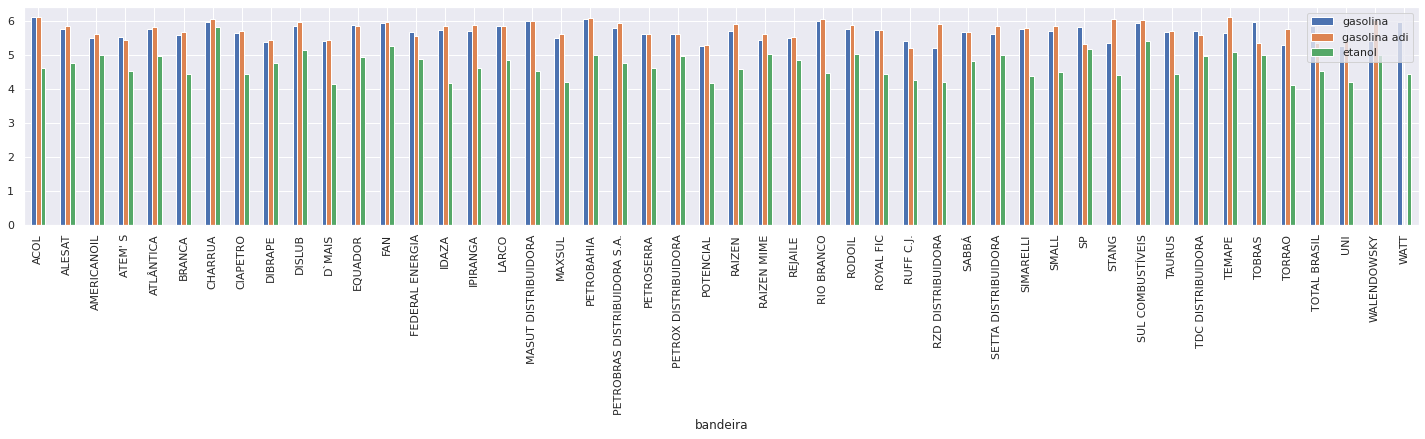

In [ ]:
#cgbf.plot(x='Bandeira', y=['mean'], kind='bar')
a = pd.DataFrame({'bandeira':cgbf['Bandeira'], 'gasolina':cgbf['mean'], 'gasolina adi':cgabf['mean'], 'etanol':cebf['mean']})
#a.plot(x='bandeira', y=['gasolina', 'gasolina adi', 'etanol'], kind='bar')
#a.hist(bins = 40, ec = "k", alpha = .6, color = "royalblue")
#a.corr()
a.plot(x='bandeira', kind='bar', figsize=(25, 4))

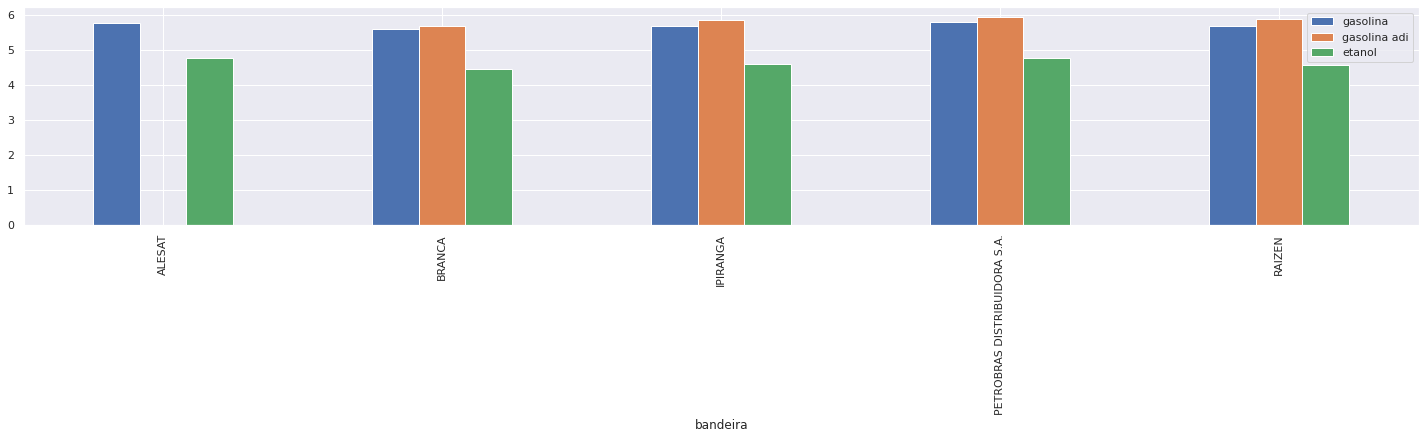

In [ ]:
gasol_query = cgbf.query('count > 300')
gasola_query = cgabf.query('count > 300')
etanol_query = cebf.query('count > 300')
comb_grafico = pd.DataFrame({'bandeira':gasol_query['Bandeira'], 'gasolina':gasol_query['mean'], 'gasolina adi':gasola_query['mean'], 'etanol':etanol_query['mean']})
comb_grafico.plot(x='bandeira', kind='bar', figsize=(25, 4))

## **Questão 11 - Outlier Gasolina**

> Análise de desvio de padrão no preço da gasolina.



In [ ]:
#outlier_06 = gasol_06.filter(['Estado - Sigla', 'Produto', 'Valor de Venda'], axis=1)


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


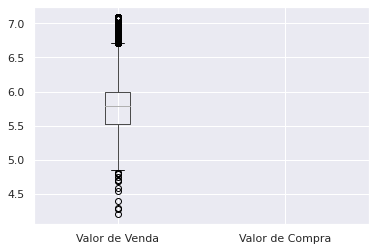

In [ ]:
outlierGasol = df6e7Gasolina.boxplot()

Notamos que os valores, apesar de baixos, não era tão distantes da média.

## **Questão 12 - Outlier Etanol**

> Análise de desvio de padrão no preço do etanol.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


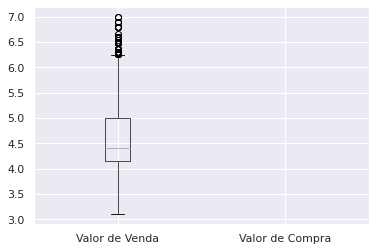

In [ ]:
outlierEtanol = df6e7Etanol.boxplot()

Notamos que os valores, diferentemente da gasolina que era abaixo do valor médio, o outlier do Etanol eram valores acima da média e bem distantes do Valor de Venda padrão.

##**Conclusão**

A partir das análises realizadas no projeto, podemos verificar que as regiões mais afastadas são as que mais sofrem com a variação de preço do combustível. Por exemplo, nas médias de valor mais alto por estado, a região Norte e Centro Oeste foram as que obtiveram os maiores valores de preço de venda. A diferença na precificação da gasolina entre os estados também pode ser explicada pelo valor do ICMS. 

Foram realizadas pesquisas complementares para compreender o contexto sócio econômico vigente no país durante o período analisado e nos demais meses de 2021. O objetivo era analisar se os valores pertenciam a algum padrão.
A partir das consultas, compreendemos que no mês 6 (junho) houve um pico, enquanto no mês 7 (julho) se estabilizou, devido a fatores variantes de especulação e também ao agravante da pandemia.

Foi possível verificar ainda que, as cidades que apresentam os valores mais altos da gasolina e do etanol, não estão localizadas no centro-oeste, que é a região que possui a maior média nacional de preços de venda dos produtos.

Nas questões finais, utilizamos gráficos (boxplot) para analisar possíveis outliers. Devido a curta periodicidade da análise, constatou-se uma variação mínima. A expectativa era de que esses resultados fossem valores discrepantes em relação a valores altos, porém os outliers foram abaixo da média. 

Contudo, vale ressaltar que o valor do combustível está alto de uma maneira geral e diversos fatores podem influenciar o preço, como por exemplo: cotações do dólar, do barril de petróleo e de outras commodities. 

O Brasil apesar de ser um dos maiores produtores de petróleo, não possui tecnologia de refino e, por isso, precisa importar de outros países. O valor do petróleo afeta a inflação e a logística de comércio não beneficia as regiões com maiores potenciais de venda.